In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv(r"C:\Users\shyam\Downloads\patient_segmentation_dataset.csv")
df.head()


,PatientID,Age,Gender,State,City,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
0,P10000,64,Male,GA,Unknown,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0
1,P10001,59,Male,OH,Unknown,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0
2,P10002,58,Female,PA,Unknown,156,91,37.4,Private,Asthma,1,4,999.0,2025-09-16,126,0
3,P10003,43,Female,GA,Unknown,152,92,39.8,Medicare,Hypertension,1,6,5638.5,2025-04-09,286,1
4,P10004,53,Female,NC,Unknown,167,51,18.3,Medicaid,Asthma,1,4,5796.0,2025-03-07,319,0


In [8]:
df.shape

(2000, 16)

In [9]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'State', 'City', 'Height_cm', 'Weight_kg',
       'BMI', 'Insurance_Type', 'Primary_Condition', 'Num_Chronic_Conditions',
       'Annual_Visits', 'Avg_Billing_Amount', 'Last_Visit_Date',
       'Days_Since_Last_Visit', 'Preventive_Care_Flag'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2000 non-null   object 
 1   Age                     2000 non-null   int64  
 2   Gender                  2000 non-null   object 
 3   State                   2000 non-null   object 
 4   City                    2000 non-null   object 
 5   Height_cm               2000 non-null   int64  
 6   Weight_kg               2000 non-null   int64  
 7   BMI                     2000 non-null   float64
 8   Insurance_Type          2000 non-null   object 
 9   Primary_Condition       1505 non-null   object 
 10  Num_Chronic_Conditions  2000 non-null   int64  
 11  Annual_Visits           2000 non-null   int64  
 12  Avg_Billing_Amount      2000 non-null   float64
 13  Last_Visit_Date         2000 non-null   object 
 14  Days_Since_Last_Visit   2000 non-null   

In [11]:
df.describe()

,Age,Height_cm,Weight_kg,BMI,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Days_Since_Last_Visit,Preventive_Care_Flag
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,50.69550,167.907500,85.143500,30.740650,1.080000,5.466500,4000.270500,180.085000,0.464000
std,15.44445,12.684494,20.385428,8.839952,0.890504,3.485965,2463.239215,104.688484,0.498827
min,18.00000,145.000000,50.000000,13.400000,0.000000,1.000000,207.000000,1.000000,0.000000
25%,40.00000,158.000000,67.000000,23.800000,1.000000,3.000000,2061.000000,90.000000,0.000000
50%,51.00000,168.000000,86.000000,30.100000,1.000000,4.000000,3707.250000,183.000000,0.000000
75%,63.25000,177.000000,103.000000,37.025000,1.000000,8.000000,5650.875000,268.000000,1.000000
max,87.00000,195.000000,120.000000,57.100000,3.000000,12.000000,12467.500000,365.000000,1.000000


In [12]:
df.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
State                       0
City                        0
Height_cm                   0
Weight_kg                   0
BMI                         0
Insurance_Type              0
Primary_Condition         495
Num_Chronic_Conditions      0
Annual_Visits               0
Avg_Billing_Amount          0
Last_Visit_Date             0
Days_Since_Last_Visit       0
Preventive_Care_Flag        0
dtype: int64

In [15]:
df['Primary_Condition']=df['Primary_Condition'].fillna('Unknown')

In [16]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
State                     0
City                      0
Height_cm                 0
Weight_kg                 0
BMI                       0
Insurance_Type            0
Primary_Condition         0
Num_Chronic_Conditions    0
Annual_Visits             0
Avg_Billing_Amount        0
Last_Visit_Date           0
Days_Since_Last_Visit     0
Preventive_Care_Flag      0
dtype: int64

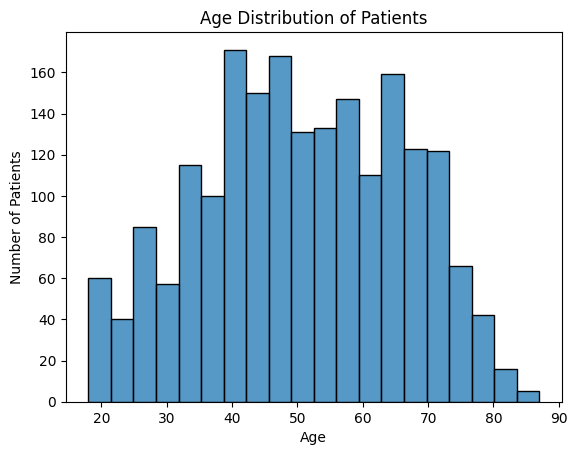

In [17]:
plt.figure()
sns.histplot(df['Age'], bins=20)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()


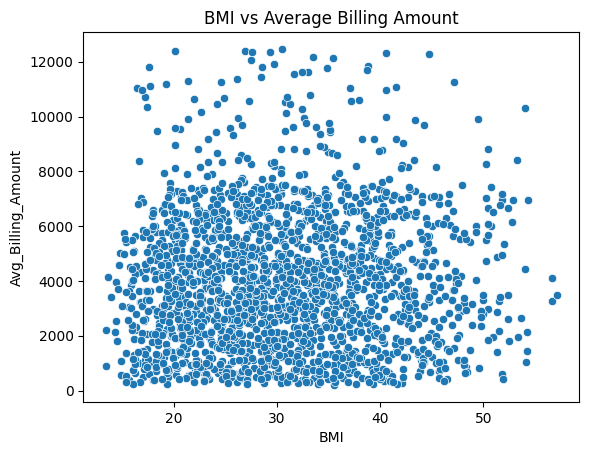

In [19]:
plt.figure()
sns.scatterplot(x='BMI', y='Avg_Billing_Amount', data=df)
plt.title("BMI vs Average Billing Amount")
plt.show()


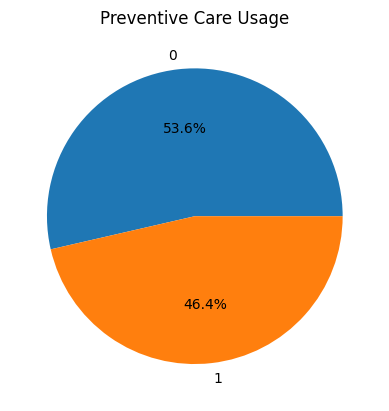

In [20]:
plt.figure()
df['Preventive_Care_Flag'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Preventive Care Usage")
plt.ylabel("")
plt.show()


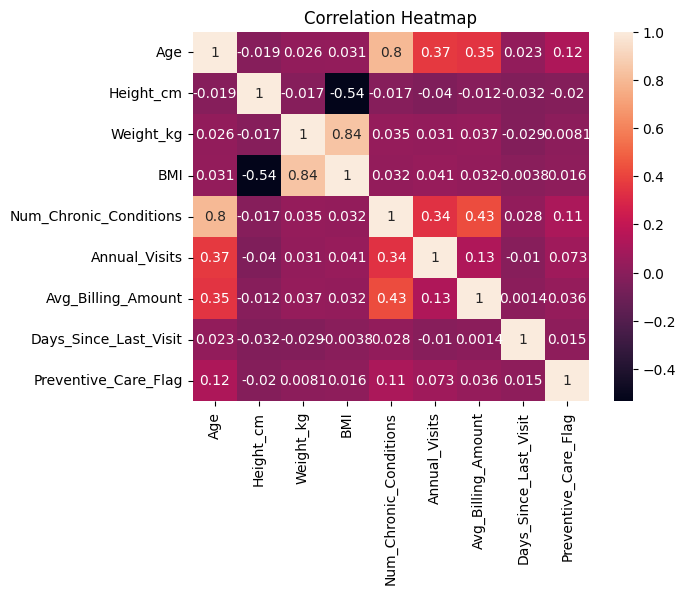

In [22]:
plt.figure()
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()


<Figure size 640x480 with 0 Axes>

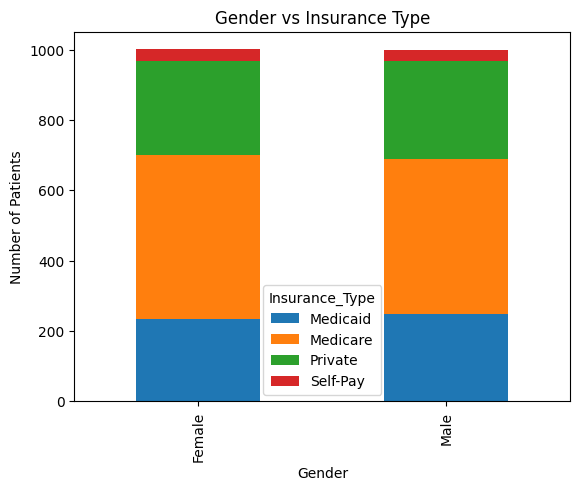

In [28]:
plt.figure()
pd.crosstab(df['Gender'], df['Insurance_Type']).plot(kind='bar', stacked=True)
plt.title("Gender vs Insurance Type")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.show()
